# Importing important libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, SimpleRNN, Dense, Flatten
import tensorflow as tf

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num of GPUs found", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num of GPUs found 1


# Creating the deterministic series

## Create a sin(x) wave with w = 0.1 and t = 0 to 1000

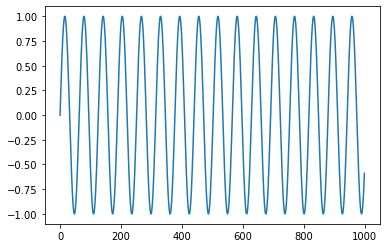

In [3]:
# make sin(x) function and sample data

data = np.sin(0.1*np.arange(1000))

plt.plot(data);

# Making the data

## The RNN takes data of shape (N,T,D) with N  = number of samples , T = Time (eg. 10 instances) and D = dimension of features

### Here we take T = 10, D = 1 (since only amplitude) and divide into X and Y 

In [ ]:
T = 10
D = 1
X = []
Y = []
for t in range(len(data)-T):
    X.append(data[t:t+T])
    Y.append(data[t+T])
    
    
X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)

# Model
## We have used functional API of keras to make the model

## simple Input layer with shape (10,1)
## SimpleRNN layer with 20 units and default tanh activation 

In [5]:
i = Input(shape = (T,1))
o = SimpleRNN(20)(i)
o = Dense(1)(o)

model = Model(i, o)

# Compiling and fitting

## We used ADAM optimizer with mse as loss function
## We train the model on 1st half of data and validate on 2nd half with epochs = 100

In [6]:
model.compile(optimizer = 'adam', loss = 'mse')

N = X.shape[0]

r = model.fit(X[:N//2], Y[:N//2], validation_data = (X[N//2:], Y[N//2:]), epochs = 100)

Epoch 1/100
16/16 [==============================] - 2s 36ms/step - loss: 0.2599 - val_loss: 0.1063
Epoch 2/100
16/16 [==============================] - 0s 23ms/step - loss: 0.0797 - val_loss: 0.0446
Epoch 3/100
16/16 [==============================] - 0s 23ms/step - loss: 0.0304 - val_loss: 0.0186
Epoch 4/100
16/16 [==============================] - 0s 22ms/step - loss: 0.0147 - val_loss: 0.0108
Epoch 5/100
16/16 [==============================] - 0s 28ms/step - loss: 0.0096 - val_loss: 0.0081
Epoch 6/100
16/16 [==============================] - 0s 28ms/step - loss: 0.0076 - val_loss: 0.0069
Epoch 7/100
16/16 [==============================] - 0s 27ms/step - loss: 0.0064 - val_loss: 0.0057
Epoch 8/100
16/16 [==============================] - 0s 25ms/step - loss: 0.0053 - val_loss: 0.0048
Epoch 9/100
16/16 [==============================] - 0s 23ms/step - loss: 0.0045 - val_loss: 0.0040
Epoch 10/100
16/16 [==============================] - 0s 23ms/step - loss: 0.0038 - val_loss: 0.0034

16/16 [==============================] - 0s 26ms/step - loss: 6.5504e-05 - val_loss: 6.4720e-05
Epoch 78/100
16/16 [==============================] - 0s 25ms/step - loss: 6.4966e-05 - val_loss: 6.9536e-05
Epoch 79/100
16/16 [==============================] - 0s 22ms/step - loss: 6.1792e-05 - val_loss: 6.6089e-05
Epoch 80/100
16/16 [==============================] - 0s 22ms/step - loss: 6.1866e-05 - val_loss: 6.2735e-05
Epoch 81/100
16/16 [==============================] - 0s 25ms/step - loss: 5.9375e-05 - val_loss: 5.7309e-05
Epoch 82/100
16/16 [==============================] - 0s 22ms/step - loss: 5.6032e-05 - val_loss: 5.4794e-05
Epoch 83/100
16/16 [==============================] - 0s 23ms/step - loss: 5.5074e-05 - val_loss: 5.3408e-05
Epoch 84/100
16/16 [==============================] - 0s 26ms/step - loss: 5.2875e-05 - val_loss: 6.3464e-05
Epoch 85/100
16/16 [==============================] - 0s 24ms/step - loss: 5.7452e-05 - val_loss: 5.2662e-05
Epoch 86/100
16/16 [============

# History
## Making a function to plot history object i.e. loss in this case

In [7]:
def history_printer(model, argument):
    plt.plot(model.history[argument], label = argument)
    plt.plot(model.history['val_'+argument], label = "val_"+argument)
    plt.legend()

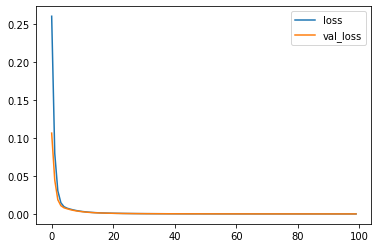

In [8]:
history_printer(r, 'loss')

# Predictions
## We predict the values and use the predicted value as new input, this way we guarantee correct prediction

In [9]:
validation_target = Y[N//2:]
validation_prediction = []

last_x = X[N//2]
while len(validation_prediction)<len(validation_target):
    pred = model.predict(last_x.reshape(1,-1,1))[0,0]
    validation_prediction.append(pred)
    last_x = np.roll(last_x, -1)
    last_x[-1] = pred

## Original labels vs predicted labels
## This is a deterministic function hence predicted beautifully

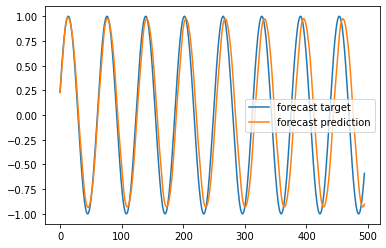

In [10]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_prediction, label='forecast prediction')
plt.legend()